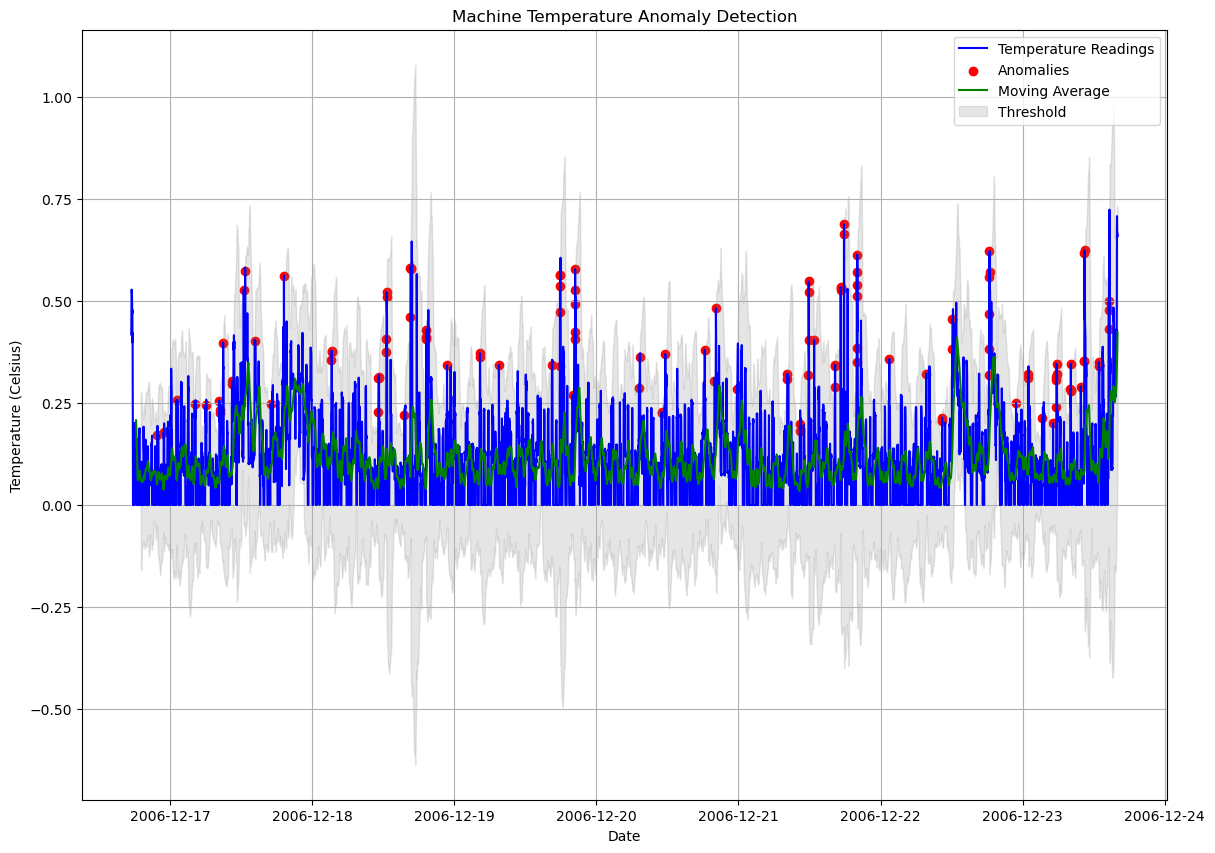

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('household_power_consumption7_limited.csv')

# Convert the timestamp column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate the moving average of the temperature readings
window_size = 50 # MODIFICATION, original was 50
ma = df['value'].rolling(window_size).mean()

# Calculate the deviation from the moving average
deviation = df['value'] - ma

# Calculate the standard deviation of the deviation
std_deviation = deviation.rolling(window_size).std()

# Calculate the threshold for anomaly detection
threshold = 3 * std_deviation

# Detect anomalies based on deviations from the moving average
anomalies = df[deviation.abs() > threshold]

# Plot the temperature readings and the anomalies
plt.subplots(figsize=(14, 10)) # MODIFICATION, inserted
plt.plot(df['timestamp'], df['value'], color='blue', label='Temperature Readings')
plt.scatter(anomalies['timestamp'], anomalies['value'], color='red', label='Anomalies')
plt.plot(df['timestamp'], ma, color='green', label='Moving Average')
plt.fill_between(df['timestamp'], ma-threshold, ma+threshold, color='gray', alpha=0.2, label='Threshold')
plt.legend()
plt.title('Machine Temperature Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid() # MODIFICATION, inserte
